In [ ]:
import csv

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

Dane zostały podzielone w proporcjach 67% (zbiór treningowy) i 33% (zbiór testowy), dane zostały również ustandaryzowane:

In [ ]:
def create_datasets():
    with open('./diabetes.csv', 'r') as diabetes:
        plots = csv.reader(diabetes, delimiter = ',')
        has_header = csv.Sniffer().has_header(diabetes.read(1024))
        diabetes.seek(0)

        if has_header:
            next(plots)

        for row in plots:
            data.append(row[:-1])
            target.append(row[-1])

    return train_test_split(data, target, test_size = 0.33, random_state = 1)


def standarize_datasets():
    sc = StandardScaler()
    sc.fit(data_train)
    data_train_std = sc.transform(data_train)
    data_test_std = sc.transform(data_test)

    return data_train_std, data_test_std

# Creating empty lists
target = []
data = []

# Creating and standardizing datasets
data_train, data_test, target_train, target_test = create_datasets()
data_train_std, data_test_std = standarize_datasets()

In [ ]:
def print_confusion_matrix(classifier, matrix_target_test, matrix_target_pred):
    # labels = [0, 1]
    matrix = confusion_matrix(matrix_target_test, matrix_target_pred)
    # display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = labels)
    # display.plot()
    # display.ax_.set_title(f"{classifier} confusion matrix")
    print(f"{classifier}, confusion matrix:")
    print(f"TP: {matrix[0][0]}  |   FN: {matrix[0][1]}")
    print(f"FP: {matrix[1][0]}  |   TN: {matrix[1][1]}")
    print(f"Accuracy: {round(accuracy_score(matrix_target_pred, target_test) * 100, 2)}%\n")
    plt.show()

In [ ]:
def knn_prediction(n_neighbors, knn_data_train, knn_target_train, knn_data_test):
    knn = KNeighborsClassifier(n_neighbors = n_neighbors, metric = 'euclidean')
    knn.fit(knn_data_train, knn_target_train)

    return knn.predict(knn_data_test)

# Neighbours 3

knn3_pred = knn_prediction(3, data_train_std, target_train, data_test_std)
print_confusion_matrix("k-NN; k = 3", target_test, knn3_pred)

# Neighbours 5

knn5_pred = knn_prediction(5, data_train_std, target_train, data_test_std)
print_confusion_matrix("k-NN; k = 5", target_test, knn5_pred)

# Neighbours 11

knn11_pred = knn_prediction(11, data_train_std, target_train, data_test_std)
print_confusion_matrix("k-NN; k = 11", target_test, knn11_pred)

In [ ]:
def naive_bayes_prediction(nb_data_train, nb_target_train, nb_data_test):
    naive_bayes = GaussianNB()
    naive_bayes.fit(nb_data_train, nb_target_train)

    return naive_bayes.predict(nb_data_test)

# Naive Bayes

nb_pred = naive_bayes_prediction(data_train_std, target_train, data_test_std)
print_confusion_matrix("Naive Bayes", target_test, nb_pred)

In [ ]:
def decision_tree_prediction(dt_data_train, dt_target_train, dt_data_test):
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(dt_data_train, dt_target_train)

    return decision_tree.predict(dt_data_test)

# Decision Tree

dt_pred = decision_tree_prediction(data_train_std, target_train, data_test_std)
print_confusion_matrix("Decision Tree", target_test, dt_pred)

In [ ]:
# Accuracy Bar Graph

figure, axes = plt.subplots()

classifier_names = [
    "k-NN; k = 3",
    "k-NN; k = 5",
    "k-NN; k = 11",
    "Naive Bayes",
    "Decision Tree"
]

bar_labels = ["k-NN; k = 3", "k-NN; k = 5", "k-NN; k = 11", "Naive Bayes", "Decision Tree"]
bar_colors = ['black', 'red', 'blue', 'orange', 'green']

accuracies = [
    accuracy_score(target_test, knn3_pred) * 100,
    accuracy_score(target_test, knn5_pred) * 100,
    accuracy_score(target_test, knn11_pred) * 100,
    accuracy_score(target_test, nb_pred) * 100,
    accuracy_score(target_test, dt_pred) * 100
]

axes.bar(classifier_names, accuracies, label = bar_labels, color = bar_colors)
axes.set_title("Classifier accuracy")
axes.legend(title = "Classifier")
plt.show()

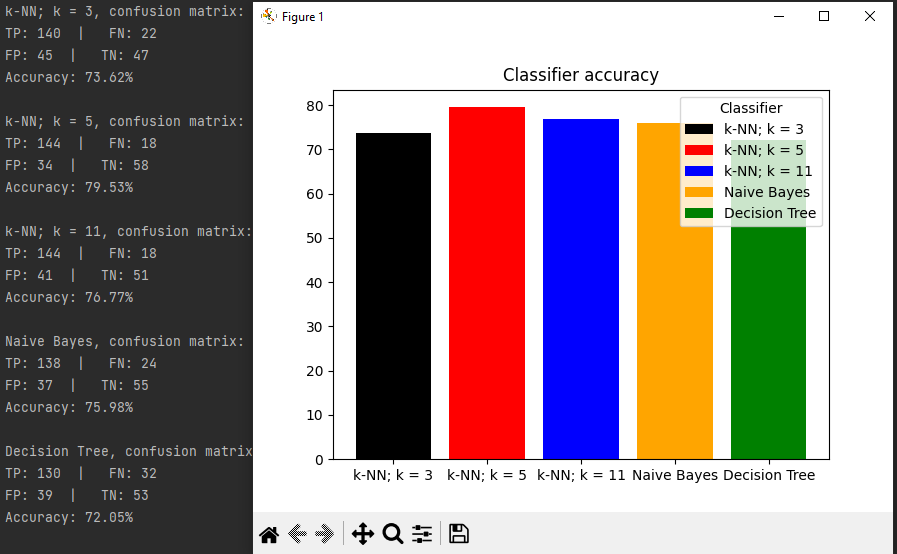